In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.io as sio
from scipy.stats import multivariate_normal
%matplotlib inline

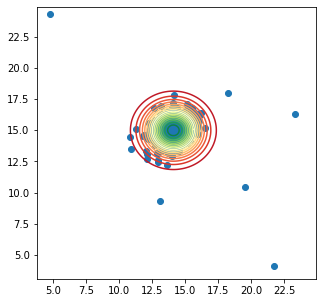

In [20]:
raw_data = sio.loadmat('ex8data1.mat')

X = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X['X1'], X['X2'])


xplt, yplt = np.mgrid[5:25:.1, 5:25:.1]
pos = np.empty(xplt.shape + (2,))
pos[:, :, 0] = xplt
pos[:, :, 1] = yplt
mean = X.mean(axis=0)
cov = X.var(axis=0)
prbd = multivariate_normal(mean, cov)
proba = prbd.pdf(pos)
plt.contour(xplt, yplt, proba, 20, cmap='RdYlGn')

In [59]:
from sklearn.covariance import EllipticEnvelope
outlierCls = EllipticEnvelope(contamination = 0.01)
outlierCls.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.01, random_state=None,
                 store_precision=True, support_fraction=None)

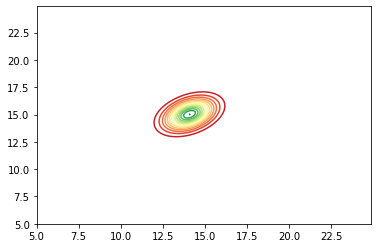

In [60]:
xplt, yplt = np.mgrid[5:25:.1, 5:25:.1]
pos = np.empty(xplt.shape + (2,))
pos[:, :, 0] = xplt
pos[:, :, 1] = yplt
mean = outlierCls.location_
sigma = outlierCls.covariance_ 
prbd = multivariate_normal(mean, sigma)
proba = prbd.pdf(pos)
plt.contour(xplt, yplt, proba, 20, cmap='RdYlGn')

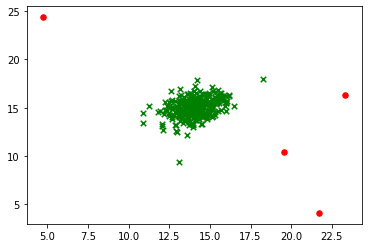

In [61]:
proba = outlierCls.predict(X)
positive = X[proba==1]
negative = X[proba==-1]
plt.scatter(positive['X1'], positive['X2'], s=30, marker='x', c ="green", label='Positive')
plt.scatter(negative['X1'], negative['X2'], s=30, marker='o', c ="red", label='Negative')

Collaborative Filtering
Recommendation system

In [63]:
data = loadmat('ex8_movies.mat')
Y = data['Y'] #rating 0 to 5
R = data['R'] #indicating whether user rated movie
Y.shape, R.shape

((1682, 943), (1682, 943))

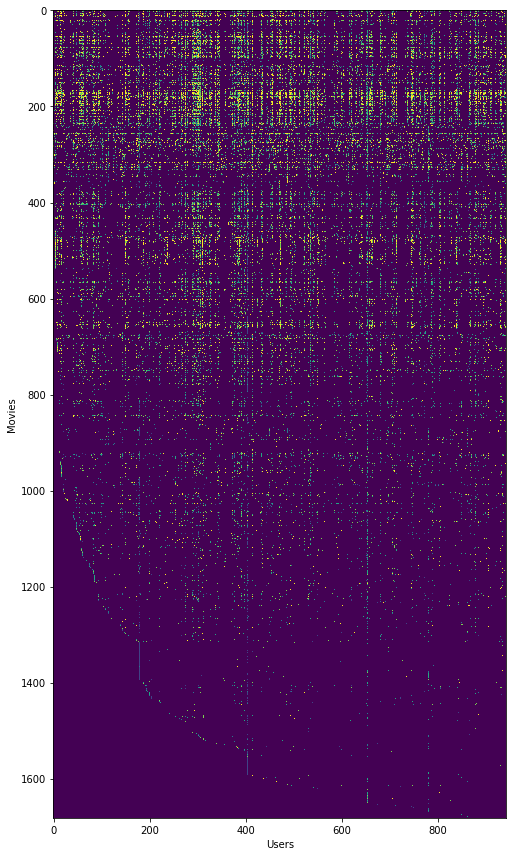

In [64]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
fig.tight_layout()

In [80]:
#average rating of a movie
MvIdx = 1500
Y[MvIdx,np.where(R[MvIdx,:]==1)[0]].mean()

3.0

In [81]:
Y[MvIdx,np.where(R[MvIdx,:]==1)[0]]

array([1, 4, 3, 3, 4], dtype=uint8)